**CAMB usage example for matter power spectrum**

Taken from https://camb.readthedocs.io/en/latest/CAMBdemo.html

In [1]:
!pip install camb

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import camb
from camb import model, initialpower

In [3]:
# Set cosmological parameters
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.70, ombh2=0.022447, omch2=0.11928, omk=0, tau=0.0568)
pars.InitPower.set_params(ns=0.965)
pars.InitPower.set_params(As=np.exp(3.0480) / 1e10, ns=0.9682, r=0)

# Linear matter power spectra
pars.set_matter_power(redshifts=[0., 0.8], kmax=2.0)
pars.NonLinear = model.NonLinear_none

# Run camb
results = camb.get_results(pars)

Note: redshifts have been re-sorted (earliest first)


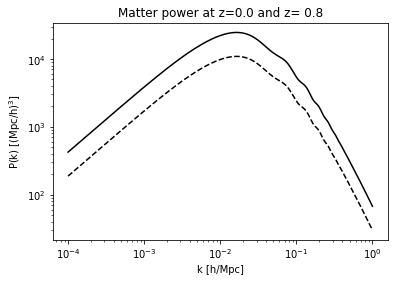

In [4]:
# Matter power spectrum
k_over_h, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
for i, (redshift, line) in enumerate(zip(z,['-','--'])):
    plt.loglog(k_over_h, pk[i,:], color='k', ls = line)
plt.xlabel('k [h/Mpc]')
plt.ylabel('P(k) [(Mpc/h)$^3$]')
plt.title('Matter power at z=%s and z= %s'%tuple(z));

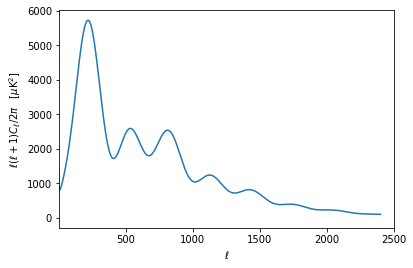

In [5]:
# CMB temperature perturbations.
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
totCl=powers['total']
Cl_TT = totCl[:,0]
ls = np.arange(totCl.shape[0])
plt.plot(ls, Cl_TT)
plt.xlabel("$\ell$")
plt.ylabel("$\ell(\ell + 1) C_\ell/2\pi$   [$\mu$K$^2$]")
plt.xlim((5, 2500));